<a href="https://colab.research.google.com/github/Pavitr-Swain/stress-analysis-social-media/blob/main/Stress_Analysis_in_Social_Media.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stress Analysis in Social Media
Stress analysis in social media involves examining how interactions and content on platforms like Facebook, Twitter, and Instagram impact users' mental health. Researchers utilize various methods, such as sentiment analysis, machine learning, and natural language processing, to evaluate the tone and emotional content of posts, comments, and messages. These analyses help identify stressors, such as cyberbullying, comparison with others, and information overload. The findings can inform strategies to mitigate stress, promote well-being, and create healthier online environments. Understanding these dynamics is crucial as social media becomes increasingly integral to daily life.

In [1]:
import pandas as pd
import numpy as np
from wordcloud import STOPWORDS
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

In [2]:
df1=pd.read_csv("/content/dreaddit-train.csv")

In [3]:
df1

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.800000,1521614353,5,1.806818,...,1.0000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.000000,1527009817,4,9.429737,...,1.1250,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.800000,1535935605,2,7.769821,...,1.0000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.600000,1516429555,0,2.667798,...,1.0000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.800000,1539809005,24,7.554238,...,1.0000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2833,relationships,7oee1t,"[35, 40]","* Her, a week ago: Precious, how are you? (I i...",1713,0,1.000000,1515187044,13,-1.369333,...,1.4000,1.0000,1.0,1.71133,1.45301,2.00304,0.84,16,0.254444,0.552066
2834,ptsd,9p4ung,"[20, 25]",I don't have the ability to cope with it anymo...,1133,1,1.000000,1539827412,33,9.425478,...,1.0000,1.0000,1.0,1.65003,1.56842,1.81527,0.96,6,8.640664,-0.220370
2835,anxiety,9nam6l,"(5, 10)",In case this is the first time you're reading ...,10442,0,1.000000,1539269312,2,11.060675,...,1.1250,1.1250,1.0,1.79768,1.49074,1.92286,1.00,1,9.951524,0.045455
2836,almosthomeless,5y53ya,"[5, 10]",Do you find this normal? They have a good rela...,1834,0,0.571429,1488938143,4,2.421912,...,1.1111,1.1429,1.0,1.71642,1.57627,1.89972,0.75,7,4.036765,0.159722


In [4]:
df1.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Columns: 116 entries, subreddit to sentiment
dtypes: float64(106), int64(6), object(4)
memory usage: 2.5+ MB


In [6]:
df1.describe()

,id,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
count,2838.000000,2838.000000,2838.000000,2.838000e+03,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,...,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000
mean,13751.999295,0.524313,0.808972,1.518107e+09,18.262156,4.684272,85.996124,35.240941,40.948231,67.044249,...,1.088001,1.120099,1.000211,1.722759,1.536400,1.879385,0.843517,9.948555,5.448836,0.040740
std,17340.161897,0.499497,0.177038,1.552209e+07,79.419166,3.316435,32.334887,26.486189,31.587117,32.880644,...,0.117159,0.085227,0.006500,0.047835,0.102971,0.058932,0.174794,21.798032,2.535829,0.195490
min,4.000000,0.000000,0.428571,1.483274e+09,0.000000,-6.620000,5.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.485400,1.200000,1.561150,0.140000,0.000000,-1.918000,-1.000000
25%,926.250000,0.000000,0.600000,1.509698e+09,2.000000,2.464243,65.000000,12.410000,12.135000,41.070000,...,1.000000,1.000000,1.000000,1.691430,1.469745,1.841782,0.750000,2.000000,3.729973,-0.072222
50%,1891.500000,1.000000,0.800000,1.517066e+09,5.000000,4.321886,81.000000,29.420000,33.520000,80.710000,...,1.000000,1.142900,1.000000,1.721430,1.530295,1.878250,0.890000,5.000000,5.210000,0.044821
75%,25473.750000,1.000000,1.000000,1.530898e+09,10.000000,6.505657,101.000000,55.057500,69.320000,96.180000,...,1.142900,1.142900,1.000000,1.751760,1.596030,1.916243,1.000000,10.000000,6.855217,0.166667
max,55757.000000,1.000000,1.000000,1.542592e+09,1435.000000,24.074231,310.000000,99.000000,99.000000,99.000000,...,1.900000,1.500000,1.200000,2.007400,2.066670,2.158490,1.000000,416.000000,21.198919,1.000000


In [7]:
df1.isnull()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2834,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2835,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2836,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
df1.shape

(2838, 116)

In [9]:
df1.sample()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
2243,ptsd,8kquqf,"[65, 70]",He told me that I needed to be naked because h...,78,0,0.571429,1526795378,1,0.90939,...,1.0,1.1429,1.0,1.78543,1.78133,1.90834,0.67,3,3.024751,0.25


In [10]:
df3=pd.read_csv("/content/dreaddit-test.csv")

In [11]:
df3.head()

,id,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,896,relationships,7nu7as,"[50, 55]","Its like that, if you want or not.“ ME: I have...",0,0.8,1514980773,22,-1.238793,...,1.0000,1.2000,1.0,1.65864,1.32245,1.80264,0.63,62,-0.148707,0.000000
1,19059,anxiety,680i6d,"(5, 10)",I man the front desk and my title is HR Custom...,0,1.0,1493348050,5,7.684583,...,1.4000,1.1250,1.0,1.69133,1.69180,1.97249,1.00,2,7.398222,-0.065909
2,7977,ptsd,8eeu1t,"(5, 10)",We'd be saving so much money with this new hou...,1,1.0,1524516630,10,2.360408,...,1.1429,1.0000,1.0,1.70974,1.52985,1.86108,1.00,8,3.149288,-0.036818
3,1214,ptsd,8d28vu,"[2, 7]","My ex used to shoot back with ""Do you want me ...",1,0.5,1524018289,5,5.997000,...,1.0000,1.3000,1.0,1.72615,1.52000,1.84909,1.00,7,6.606000,-0.066667
4,1965,relationships,7r1e85,"[23, 28]",I haven’t said anything to him yet because I’m...,0,0.8,1516200171,138,4.649418,...,1.1250,1.1429,1.0,1.75642,1.43582,1.91725,0.84,70,4.801869,0.141667


In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Columns: 116 entries, id to sentiment
dtypes: float64(106), int64(6), object(4)
memory usage: 648.1+ KB


In [13]:
df3.describe()

,id,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
count,715.000000,715.000000,715.000000,7.150000e+02,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,...,715.000000,715.000000,715.00000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000
mean,13861.372028,0.516084,0.717895,1.517570e+09,24.627972,4.705624,85.667133,34.743399,38.410839,69.917413,...,1.081046,1.117715,1.00028,1.723382,1.529951,1.878992,0.856294,8.951049,5.497574,0.045345
std,17765.755427,0.500091,0.325688,1.553944e+07,113.086473,3.244652,31.197320,26.331580,30.834289,31.682491,...,0.107884,0.089972,0.00748,0.048894,0.100724,0.056044,0.174352,12.891993,2.490971,0.194114
min,2.000000,0.000000,0.000000,1.483330e+09,0.000000,-4.800000,12.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.574670,1.281480,1.718540,0.200000,0.000000,-2.318095,-1.000000
25%,848.000000,0.000000,0.600000,1.509572e+09,2.000000,2.584422,65.000000,11.975000,10.340000,46.400000,...,1.000000,1.000000,1.00000,1.692570,1.464260,1.841965,0.765000,2.000000,3.693035,-0.056181
50%,1778.000000,1.000000,0.800000,1.516658e+09,5.000000,4.477286,81.000000,30.370000,30.240000,84.470000,...,1.000000,1.125000,1.00000,1.720660,1.523260,1.878170,0.910000,5.000000,5.327778,0.042460
75%,26201.500000,1.000000,1.000000,1.531001e+09,10.000000,6.723889,101.500000,53.480000,61.580000,96.945000,...,1.125000,1.142900,1.00000,1.753110,1.592570,1.910965,1.000000,11.000000,7.049380,0.154701
max,55783.000000,1.000000,1.000000,1.542583e+09,1687.000000,22.535493,264.000000,98.220000,99.000000,99.000000,...,1.777800,1.777800,1.20000,1.946420,2.040000,2.140430,1.000000,128.000000,18.530103,0.800000


In [14]:
df3.isnull()

,id,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
711,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
712,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
713,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
df3.shape

(715, 116)

In [16]:
df3.sample()

,id,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
557,185,anxiety,94ky9u,"[6, 11]",I am absolutely terrified that the repairs are...,1,1.0,1533404712,1,6.249714,...,1.1111,1.1429,1.0,1.71878,1.50787,1.87998,1.0,5,6.743571,0.186136


In [17]:
df1.columns

Index(['subreddit', 'post_id', 'sentence_range', 'text', 'id', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=116)

In [18]:
df3.columns

Index(['id', 'subreddit', 'post_id', 'sentence_range', 'text', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=116)

In [19]:
df1.isnull().sum()

,0
subreddit,0
post_id,0
sentence_range,0
text,0
id,0
...,...
lex_dal_avg_pleasantness,0
social_upvote_ratio,0
social_num_comments,0
syntax_fk_grade,0


In [20]:
df3.isnull().sum()

,0
id,0
subreddit,0
post_id,0
sentence_range,0
text,0
...,...
lex_dal_avg_pleasantness,0
social_upvote_ratio,0
social_num_comments,0
syntax_fk_grade,0


In [21]:
from textblob import TextBlob

In [22]:
TextBlob("the best").polarity #We find the positive or negative of the words.

1.0

In [23]:
TextBlob("the best").sentiment

Sentiment(polarity=1.0, subjectivity=0.3)

In [24]:
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [25]:
df2=df1[["text"]]

In [26]:
df2.head()

,text
0,"He said he had not felt that way before, sugge..."
1,"Hey there r/assistance, Not sure if this is th..."
2,My mom then hit me with the newspaper and it s...
3,"until i met my new boyfriend, he is amazing, h..."
4,October is Domestic Violence Awareness Month a...


from matplotlib import pyplot as plt
import seaborn as sns
_df_14.groupby('text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [27]:
df2["sentiment"]=df2["text"].apply(detect_sentiment)

In [28]:
df2.head()

,text,sentiment
0,"He said he had not felt that way before, sugge...",-0.002742
1,"Hey there r/assistance, Not sure if this is th...",0.292857
2,My mom then hit me with the newspaper and it s...,0.011894
3,"until i met my new boyfriend, he is amazing, h...",0.141671
4,October is Domestic Violence Awareness Month a...,-0.204167


from matplotlib import pyplot as plt
_df_10['sentiment'].plot(kind='hist', bins=20, title='sentiment')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_11.groupby('text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12['sentiment'].plot(kind='line', figsize=(8, 4), title='sentiment')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['text'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='sentiment', y='text', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [29]:
df2.sentiment.value_counts()

,count
sentiment,
0.000000,63
0.250000,21
0.100000,19
0.175000,14
0.166667,12
...,...
0.038095,1
0.032727,1
0.166171,1


In [30]:
import nltk
import re
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string

In [31]:
df2["text"]

,text
0,"He said he had not felt that way before, sugge..."
1,"Hey there r/assistance, Not sure if this is th..."
2,My mom then hit me with the newspaper and it s...
3,"until i met my new boyfriend, he is amazing, h..."
4,October is Domestic Violence Awareness Month a...
...,...
2833,"* Her, a week ago: Precious, how are you? (I i..."
2834,I don't have the ability to cope with it anymo...
2835,In case this is the first time you're reading ...
2836,Do you find this normal? They have a good rela...


In [32]:
def wc(data,bgcolor):
    plt.figure(figsize=(20,20))
    mask=np.array(Image.open('/kaggle/input/stressanalysisinsocialmedia/stress-954814_960_720.png'))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis("off")

In [33]:
df2["label"]=df1["label"].map({0: "No Stress", 1: "Stress"})
df2=df2[["text", "label"]]

In [34]:
df2.head()

,text,label
0,"He said he had not felt that way before, sugge...",Stress
1,"Hey there r/assistance, Not sure if this is th...",No Stress
2,My mom then hit me with the newspaper and it s...,Stress
3,"until i met my new boyfriend, he is amazing, h...",Stress
4,October is Domestic Violence Awareness Month a...,Stress


from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_8.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['label'].value_counts()
    for x_label, grp in _df_9.groupby('text')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('text')
_ = plt.ylabel('label')

In [35]:
df2["sentiment"]=df2["text"].apply(detect_sentiment)

In [36]:
df2.head()

,text,label,sentiment
0,"He said he had not felt that way before, sugge...",Stress,-0.002742
1,"Hey there r/assistance, Not sure if this is th...",No Stress,0.292857
2,My mom then hit me with the newspaper and it s...,Stress,0.011894
3,"until i met my new boyfriend, he is amazing, h...",Stress,0.141671
4,October is Domestic Violence Awareness Month a...,Stress,-0.204167


from matplotlib import pyplot as plt
_df_0['sentiment'].plot(kind='hist', bins=20, title='sentiment')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['sentiment'].plot(kind='line', figsize=(8, 4), title='sentiment')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['label'].value_counts()
    for x_label, grp in _df_4.groupby('text')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('text')
_ = plt.ylabel('label')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_5['text'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_5, x='sentiment', y='text', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_6['label'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_6, x='sentiment', y='label', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [37]:
import seaborn as sns

<Axes: xlabel='label', ylabel='count'>

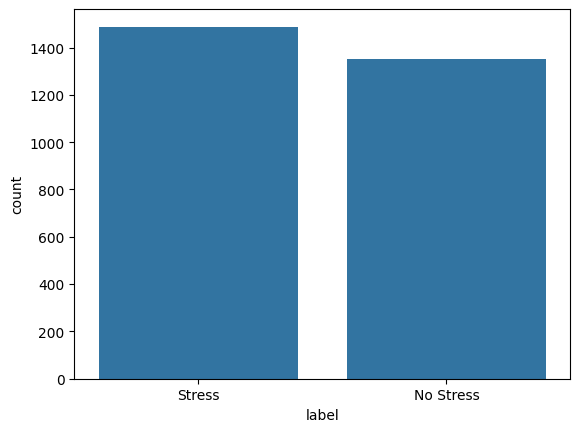

In [38]:
sns.countplot(x=df2.label)

In [39]:
df2['label'].value_counts(normalize=True) * 100


,proportion
label,
Stress,52.43129
No Stress,47.56871


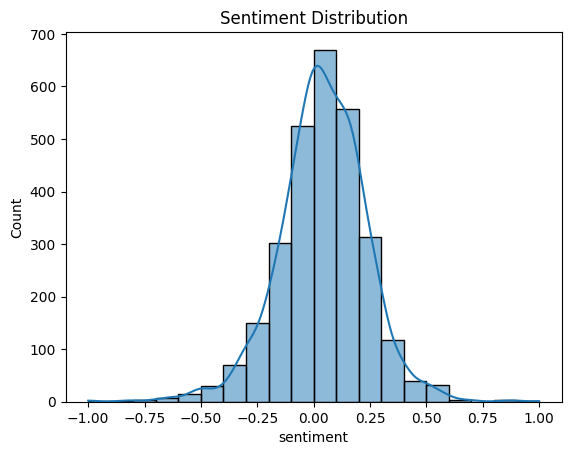

In [40]:
sns.histplot(df2['sentiment'], bins=20, kde=True)
plt.title("Sentiment Distribution")
plt.show()


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df2["text"])
y = df2["label"].map({"No Stress": 0, "Stress": 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.73      0.64      0.68       263
           1       0.72      0.80      0.76       305

    accuracy                           0.72       568
   macro avg       0.72      0.72      0.72       568
weighted avg       0.72      0.72      0.72       568

